# Objetivos 

## 1. ¿Cuáles son los equipos con mayores goles?

## 2. ¿Cuáles son los equipos con mayores asistencias?

## 3. Existe relación entre cantidad de goles y cantidad de asistencias.

## 4. Cantidad de penales atajados por arqueros. 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

In [2]:
key_stats=pd.read_csv("key_stats.csv")

In [4]:
key_stats

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered
0,Courtois,Real Madrid,Goalkeeper,1230,13,0,0,64.2
1,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0
2,Benzema,Real Madrid,Forward,1106,12,15,1,121.5
3,Modrić,Real Madrid,Midfielder,1077,13,0,4,124.5
4,Éder Militão,Real Madrid,Defender,1076,12,0,0,110.4
...,...,...,...,...,...,...,...,...
742,Gil Dias,Benfica,Midfielder,1,1,0,0,0.7
743,Rodrigo Ribeiro,Sporting CP,Forward,1,1,0,0,0.7
744,Cojocari,Sheriff,Defender,1,1,0,0,0.5
745,Maouassa,Club Brugge,Defender,1,1,0,0,0.2


In [6]:
##View information of datasets 

key_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   player_name       747 non-null    object
 1   club              747 non-null    object
 2   position          747 non-null    object
 3   minutes_played    747 non-null    int64 
 4   match_played      747 non-null    int64 
 5   goals             747 non-null    int64 
 6   assists           747 non-null    int64 
 7   distance_covered  747 non-null    object
dtypes: int64(4), object(4)
memory usage: 46.8+ KB


In [15]:
key_stats['distance_covered']=np.where(key_stats['distance_covered']=='-', 0,key_stats['distance_covered'])


In [17]:
##Convert column distance_covered str--> flot 
key_stats['distance_covered']=key_stats['distance_covered'].astype(float)

In [86]:
data_club_goals=key_stats.groupby(['club'], sort=False)['goals'].sum().reset_index()
data_club_goals=data_club_goals.sort_values(by='goals', ascending=False)
data_club_goals

,club,goals
6,Bayern,30
0,Real Madrid,28
1,Liverpool,28
3,Man. City,28
7,Chelsea,21
11,Ajax,21
2,Villarreal,20
28,Leipzig,15
12,Paris,15
13,Sporting CP,14


<Figure size 2880x2880 with 0 Axes>

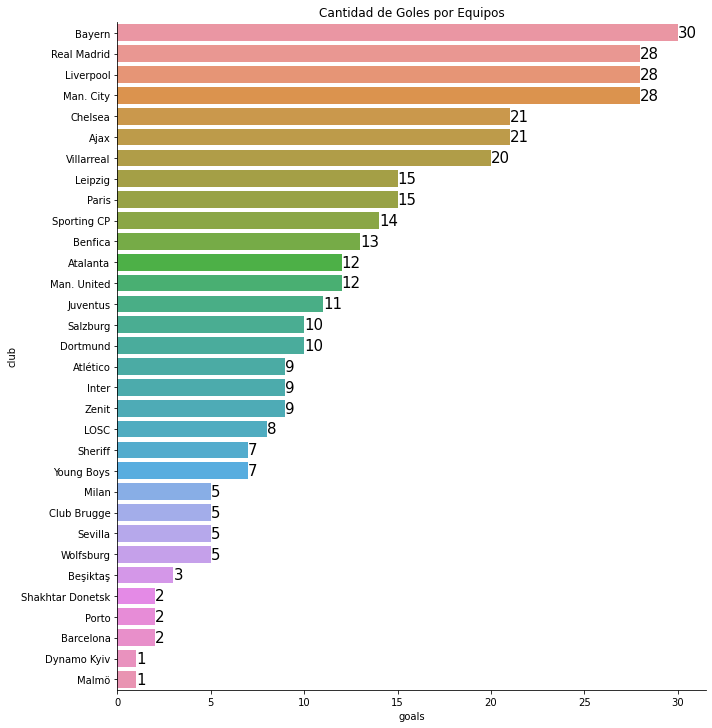

In [121]:
##barplot 
fig=plt.figure(figsize=(40,40))
g=sns.catplot(x='goals', y='club', kind='bar', data=data_club_goals, height=10)
plt.title("Cantidad de Goles por Equipos")
ax=g.facet_axis(0,0)
for c in ax.containers: 
    ax.bar_label(c,labels=data_club_goals['goals'],label_type='edge', fontsize=15)
        
        
plt.show()

## Análisis 

## Del gráfico podemos visualizar que existen 4 equipos con mayores goles estos son: 
## Bayern Munich-->Alemania

## Real Madrid -->España

## Liverpool-->Inglaterra 

## Manchester City-->Inglaterra 

## De los cuatros equipos 2 llegaron a la final que son Real Madrid y Liverpool. Por otra parte Manchester City llegó a la semifinal. En cambio Bayern Munich quedo eliminado en cuartos de final frente al Villareal que en total tiene 20 goles  que se encuentra en el septimo lugar. 


In [117]:
attacking=pd.read_csv("attacking.csv")
data_club_assists=attacking.groupby(['club'])['assists'].sum().reset_index()
data_club_assists=data_club_assists.sort_values(by='assists', ascending=False)

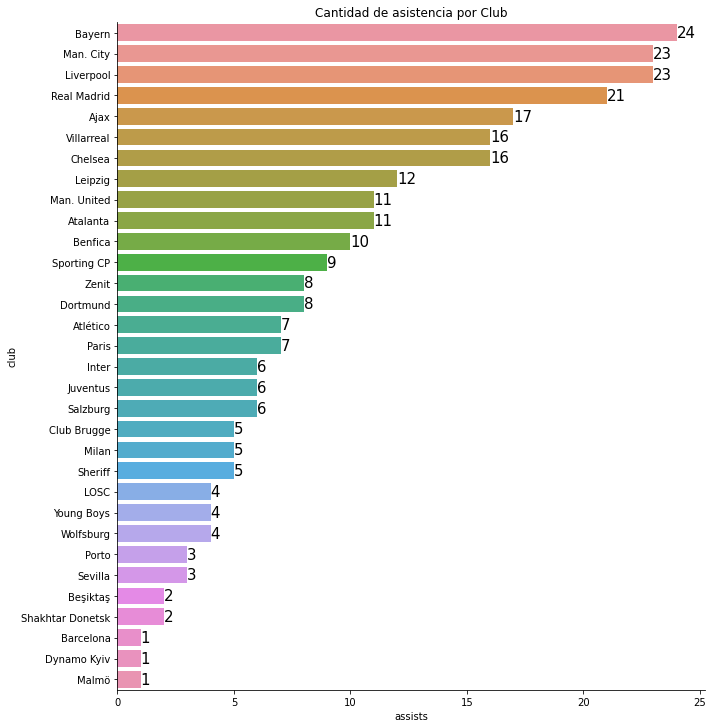

In [124]:
##barplot assists 

g=sns.catplot( x='assists', y='club',kind='bar' ,data=data_club_assists, height=10)
plt.title("Cantidad de asistencia por Club")
ax=g.facet_axis(0,0) 
for c in ax.containers: 
    ax.bar_label(c, labels=data_club_assists['assists'], label_type='edge',fontsize=15)
plt.show()

In [177]:
data=pd.merge(data_club_goals, data_club_assists, how='outer')
data

,club,goals,assists
0,Bayern,30,24
1,Real Madrid,28,21
2,Liverpool,28,23
3,Man. City,28,23
4,Chelsea,21,16
5,Ajax,21,17
6,Villarreal,20,16
7,Leipzig,15,12
8,Paris,15,7
9,Sporting CP,14,9


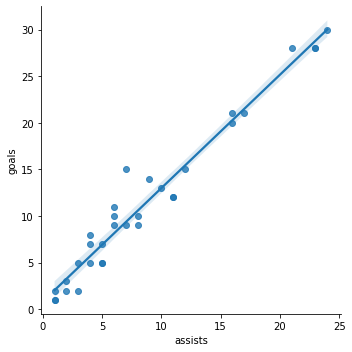

In [138]:
##Scatterplot goals vs assists 

sns.lmplot(data=data, x='assists', y='goals', ci=95)
plt.show()

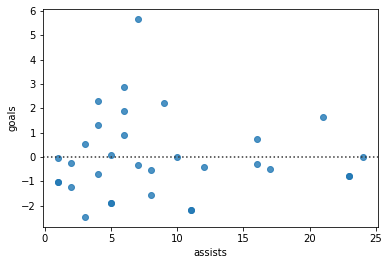

In [140]:
##residplot 

sns.residplot(data=data, x='assists', y='goals')
plt.show()

## Análisis 

## Existe una relación lineal entre la cantidad de asistencia y los goles, es decir, que a medida que aumenta las asistencias aumentan los goles. 

## Por otra parte esto no significa una relacion de causalidad, es decir, que haya más asistencias no implica que aumenten también los goles. 

In [149]:
##Coorelation goals vs assists 
data[['goals','assists']].corr()

,goals,assists
goals,1.00000,0.97935
assists,0.97935,1.00000


## Análisis de Correlación 

## La existencia de un valor de correlación alto entre los goles y las asistencias nos esta indicando que de cierta forma estamos comparando dos variables que desde la perspectiva del negocio significa lo mismo, por este motivo la recta de regresión lineal daba como resultado una recta perfecta. 

In [151]:
goalkeeping=pd.read_csv("goalkeeping.csv")
goalkeeping

,serial,player_name,club,position,saved,conceded,saved_penalties,cleansheets,punches made,match_played
0,1,Courtois,Real Madrid,Goalkeeper,61,14,1,5,4,13
1,2,Rulli,Villarreal,Goalkeeper,41,16,0,3,12,12
2,3,Vlachodimos,Benfica,Goalkeeper,38,17,1,5,5,10
3,4,Athanasiadis,Sheriff,Goalkeeper,29,8,0,1,2,5
4,5,Mignolet,Club Brugge,Goalkeeper,28,20,0,0,1,6
5,6,Oblak,Atlético,Goalkeeper,26,10,0,3,2,10
6,7,Musso,Atalanta,Goalkeeper,21,13,0,1,1,6
7,8,Ersin Destanoğlu,Beşiktaş,Goalkeeper,20,17,0,0,0,5
8,9,De Gea,Man. United,Goalkeeper,19,9,0,1,0,7
9,9,Dahlin,Malmö,Goalkeeper,19,8,1,0,3,4


In [173]:
data_goalkeeping=goalkeeping.groupby(['club'])[['saved','saved_penalties','punches made','player_name']].sum().reset_index()
data_goalkeeping=data_goalkeeping.sort_values(by='saved', ascending=False)
aux=data_goalkeeping

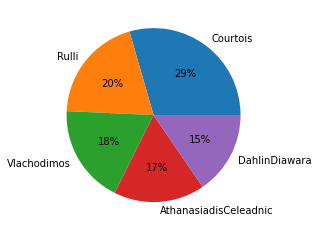

In [167]:
##Pie chart 
data_goalkeeping=data_goalkeeping.head(5)
plt.pie(data_goalkeeping['saved'], labels=data_goalkeeping['player_name'], autopct="%.0f%%")
plt.show()

In [184]:
data_final=aux
data_final=pd.merge(data_final, data, how='outer')


In [189]:
aux=pd.read_csv('defending.csv')
aux.drop(columns=['serial'], axis=1, inplace=True)
data_final=pd.merge(data_final, aux, how='outer')
aux=pd.read_csv("attempts.csv")
aux.drop(columns=['serial'], axis=1, inplace=True)
data_final=pd.merge(data_final,aux, how='outer')
data_final

,player_name,club,position,balls_recoverd,tackles,t_won,t_lost,clearance_attempted,match_played,goals,assists,total_attempts,on_target,off_target,blocked
0,Casemiro,Real Madrid,Midfielder,76.0,31.0,13.0,18.0,19.0,11,28.0,21.0,10.0,2.0,6.0,2.0
1,Éder Militão,Real Madrid,Defender,76.0,19.0,6.0,13.0,32.0,12,28.0,21.0,9.0,4.0,5.0,0.0
2,Carvajal,Real Madrid,Defender,50.0,12.0,6.0,6.0,30.0,11,28.0,21.0,5.0,2.0,3.0,0.0
3,Alaba,Real Madrid,Defender,49.0,18.0,12.0,6.0,28.0,12,28.0,21.0,5.0,1.0,1.0,3.0
4,Modrić,Real Madrid,Midfielder,39.0,9.0,3.0,6.0,4.0,13,28.0,21.0,14.0,5.0,3.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,Šimić,Salzburg,Forward,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1.0,0.0,0.0,1.0
654,Dina Ebimbe,Paris,Midfielder,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1.0,0.0,0.0,1.0
655,Izquierdo,Club Brugge,Forward,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1.0,0.0,0.0,1.0
656,Radonjić,Benfica,Forward,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1.0,0.0,0.0,1.0


In [206]:
data_final[data_final['balls_recoverd'].isna()]

,player_name,club,position,balls_recoverd,tackles,t_won,t_lost,clearance_attempted,match_played,goals,assists,total_attempts,on_target,off_target,blocked
627,Luis Díaz,Porto,Forward,NaN,NaN,NaN,NaN,NaN,13,NaN,NaN,29.0,11.0,7.0,11.0
628,Burak Yilmaz,LOSC,Forward,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,25.0,8.0,9.0,8.0
629,Muriel,Atalanta,Forward,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,8.0,4.0,2.0,2.0
630,Vlahović,Juventus,Forward,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,5.0,4.0,1.0,0.0
631,Sensi,Inter,Midfielder,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,3.0,1.0,2.0,0.0
632,Choupo-Moting,Bayern,Midfielder,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,3.0,1.0,1.0,1.0
633,Seferović,Benfica,Forward,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,3.0,1.0,1.0,1.0
634,Pizzi,Benfica,Midfielder,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,3.0,1.0,0.0,2.0
635,Ferran Torres,Man. City,Forward,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,3.0,1.0,0.0,2.0
636,Ibrahimović,Milan,Forward,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,3.0,0.0,2.0,1.0
